In [1]:
import numpy as np 
import pandas as pd 
import scipy as sp 
import matplotlib.pyplot as plt 
from matplotlib import animation, rc
import cv2 
from PIL import Image 

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
train = pd.read_csv("../input/petfinder-pawpularity-score/train.csv")
test = pd.read_csv("../input/petfinder-pawpularity-score/test.csv")
train.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [3]:

use_col = ['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
       'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']


train["img_file"] = [f"../input/petfinder-pawpularity-score/train/{f}.jpg" for f in train.Id.to_list()]
test["img_file"] = [f"../input/petfinder-pawpularity-score/test/{f}.jpg" for f in test.Id.to_list()]

train_feature = train.groupby("Id").max().loc[:, use_col]
test_feature = test.groupby("Id").max().loc[:, use_col]

train_feature.head()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
Id,,,,,,,,,,,,
0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0
0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0
0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0
0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0
001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0


In [4]:

'''
It is necessary to align the feature units of the data in advance.

columns: train.Id 
index: test.Id

'''

last_train_index = train_feature.shape[0]
df = pd.concat([train_feature, test_feature])

df_sparse = sp.sparse.csr_matrix(df.values)
df_sparse = cosine_similarity(df_sparse)
df_sparse = pd.DataFrame(df_sparse, columns=df.index, index=df.index)
df_sparse = df_sparse.iloc[:last_train_index, last_train_index:]

df_sparse.head()

Id,4128bae22183829d2b5fea10effdb0c3,43a2262d7738e3d420d453815151079e,4e429cead1848a298432a0acad014c9d,80bc3ccafcc51b66303c2c263aa38486,8f49844c382931444e68dffbe20228f4,b03f7041962238a7c9d6537e22f9b017,c978013571258ed6d4637f6e8cc9d6a3,e0de453c1bffc20c22b072b34b54e50f
Id,,,,,,,,
0007de18844b0dbbb5e1f607da0606e0,0.408248,0.577350,0.377964,0.288675,0.353553,0.530330,0.000000,0.250000
0009c66b9439883ba2750fb825e1d7db,0.288675,0.408248,0.000000,0.408248,0.500000,0.250000,0.000000,0.353553
0013fd999caf9a3efe1352ca1b0d937e,0.365148,0.258199,0.338062,0.258199,0.474342,0.474342,0.169031,0.447214
0018df346ac9c1d8413cfcc888ca8246,0.235702,0.333333,0.218218,0.333333,0.408248,0.408248,0.000000,0.288675
001dc955e10590d3ca4673f034feeef2,0.288675,0.408248,0.534522,0.000000,0.000000,0.500000,0.000000,0.000000


# Search for 

In [5]:

'''
Set up some functions and animations for similarity search.
Here, the top 10 images from the similarity 
of annotation data are displayed frame by frame.
'''


rc('animation', html='jshtml')

def find_similar_train_id(test_id, n=10):
    similar_train_id = df_sparse[test_id].sort_values(ascending=False)[:n]
    return pd.DataFrame({"similar": similar_train_id.values}, index=similar_train_id.index)


def decode_img(img_f):
    img = cv2.imread(img_f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    return img 


def create_animation(ims, ids):
    fig = plt.figure(figsize=(6, 6))
    plt.axis("off")
    plt.title(f"test_id={ids}", c="r")
    im = plt.imshow(ims[0])
    
    def animate_f(i):
        im.set_array(ims[i])
        return [im]
    return animation.FuncAnimation(fig, animate_f, frames=len(ims), interval=1000)


def find_similar_animation(test_id):
    sim_df = find_similar_train_id(test_id)
    train_imgs = []
    for sim in sim_df.index.to_list():
        train_img_f = train.loc[train.Id == sim, "img_file"].values[0]
        train_imgs.append(decode_img(train_img_f))
    return train_imgs


def find_similar_score(test_id):
    sim_df = find_similar_train_id(test_id, 1)
    score = train.loc[train.Id == sim_df.index.values[0], "Pawpularity"].values[0]
    return score 
    

In [6]:
random_test_id = np.random.choice(test.Id.to_list(), 2)

find_similar_train_id(random_test_id[0]).style.background_gradient(cmap="Blues")

,similar
Id,
3014e85aa5e809e89b8b6229d20d1c14,0.801784
7383963f13a454c843afc888bb2ad7b3,0.801784
e6ca42b8882f6ebf66867b72df3e41ae,0.790569
2425f72293ba3dc84623e77f7f1c74b0,0.790569
6930d0324a42383bba5cb9ac2a8bd17c,0.750000
eabd6d70802942f789961c14c64de571,0.750000
01e46cec0d4c2d3131ea0a46633d7d74,0.750000
0e55d5a6e356a2bedd49488823b2d0b6,0.750000
8ffde3ae7ab3726cff7ca28697687a42,0.750000


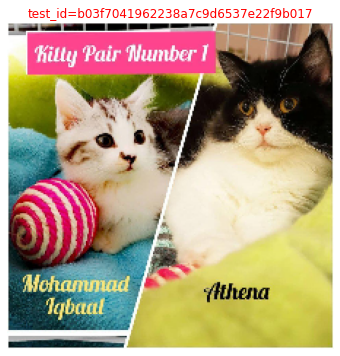

In [7]:
a = find_similar_animation(random_test_id[0])
create_animation(a, random_test_id[0])

# A simple Submission 

In [8]:

'''
Apply from similarity search to test data.
'''

similar_list = []
for test_id in test.Id.to_list():
    similar_score = find_similar_score(test_id)
    similar_list.append(similar_score)
    
sub = pd.read_csv("../input/petfinder-pawpularity-score/sample_submission.csv")
sub["Pawpularity"] = similar_list 
sub.to_csv("submission.csv", index=False)
